In [60]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [61]:
import PIL
import os
from PIL import Image

#f = r'E://box3/G/resized/128/train/G3'

#os.listdir(f)

#for file in os.listdir(f):
#    f_img = f+"/"+file
#    img = Image.open(f_img)
#    img = img.resize((80,64))
#    img.save(f_img)

In [62]:
img_width, img_height = 150, 150

train_data_dir = 'KI-67/train'
#validation_data_dir = '../input/main-dataset/main_dataset/validation'
test_data_dir = 'KI-67/test'
nb_train_samples = 250
nb_validation_samples = 40
epochs = 150
batch_size = 40
#regularizer = tf.keras.regularizers.l2(0.01,)

#if K.image_data_format() == 'channels_first':
#  input_shape = (3, img_width, img_height)
#else:
input_shape = (img_width, img_height, 3)

In [63]:
train_datagen = ImageDataGenerator(
    #rescale = 1./255,
    #shear_range = 0.3,
    #zoom_range = 0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip = True
)

test_datagen = ImageDataGenerator(#rescale = 1./255
)

In [64]:
train_batches = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #classes=['EOISINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
    class_mode = 'categorical')

Found 120 images belonging to 2 classes.


In [65]:
test_batches = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    batch_size = 40,
    #color_mode = 'grayscale',
    class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [66]:
def plots(ims, figsize=(12,6), rows=None, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [67]:
imgs, labels = next(train_batches)

In [68]:
#model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
#Eoisinophil=8[1.0.0.0],Lymphocyte=4[0.1.0.0],monocyte=2[0.0.1.0],neutrophil=1[0.0.0.1]-->Labels
#plots(imgs, rows=4, titles=labels)

In [70]:
#model = Sequential()

#model.add(Conv2D(32, kernel_size=(11,11), strides= 4,
#                        padding= 'valid', activation= 'relu',
#                        input_shape= input_shape,
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None)) 

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Flatten())
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(1000, activation= 'relu'))
#model.add(Dense(2, activation= 'softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [71]:
#model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())

#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(2, activation='softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [72]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(7,7),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(7,7),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(7,7),strides=(1,1), activation='relu', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(BatchNormalization())         
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                   loss='categorical_crossentropy',
                    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_24 (Bat  (None, 148, 148, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 146, 146, 64)      36928     
                                                                 
 batch_normalization_25 (Bat  (None, 146, 146, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_26 (Conv2D)          (None, 144, 144, 64)      36928     
                                                                 
 batch_normalization_26 (Bat  (None, 144, 144, 64)    

In [73]:
%%time
h = model.fit_generator(
    train_batches,
    steps_per_epoch = 2,
    epochs = epochs,
    validation_data = test_batches,
    validation_steps = nb_validation_samples // batch_size,
    #callbacks=[
    #    tf.keras.callbacks.ModelCheckpoint(filepath = '/kaggle/working/model_{val_accuracy:.3f}.h5', save_best_only=True,
    #                                      save_weights_only=False, monitor='val_accuracy')
    #]
)

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/150
2/2 [==============================] - 65s 34s/step - loss: 3.4169 - accuracy: 0.6000 - val_loss: 153.6379 - val_accuracy: 0.5000
Epoch 2/150
2/2 [==============================] - 47s 26s/step - loss: 13.8382 - accuracy: 0.5250 - val_loss: 235.7911 - val_accuracy: 0.5000
Epoch 3/150
2/2 [==============================] - 46s 26s/step - loss: 17.3748 - accuracy: 0.6000 - val_loss: 1457.9138 - val_accuracy: 0.5000
Epoch 4/150
2/2 [==============================] - 47s 26s/step - loss: 19.4931 - accuracy: 0.5125 - val_loss: 4329.0327 - val_accuracy: 0.5000
Epoch 5/150
2/2 [==============================] - 47s 26s/step - loss: 9.2510 - accuracy: 0.6375 - val_loss: 4879.1338 - val_accuracy: 0.5000
Epoch 6/150
2/2 [==============================] - 48s 27s/step - loss: 6.4213 - accuracy: 0.5125 - val_loss: 3899.2000 - val_accuracy: 0.5000
Epoch 7/150
2/2 [==============================] - 47s 26s/step - loss: 3.4344 - accuracy: 0.7250 - val_loss: 2014.2791 - val_accuracy: 0.500

Epoch 58/150
2/2 [==============================] - 46s 25s/step - loss: 0.4067 - accuracy: 0.7500 - val_loss: 504.9082 - val_accuracy: 0.5000
Epoch 59/150
2/2 [==============================] - 47s 26s/step - loss: 0.4460 - accuracy: 0.8000 - val_loss: 440.7545 - val_accuracy: 0.5000
Epoch 60/150
2/2 [==============================] - 46s 25s/step - loss: 0.3541 - accuracy: 0.8500 - val_loss: 390.0227 - val_accuracy: 0.5000
Epoch 61/150
2/2 [==============================] - 46s 26s/step - loss: 0.3263 - accuracy: 0.8125 - val_loss: 348.7343 - val_accuracy: 0.5000
Epoch 62/150
2/2 [==============================] - 46s 25s/step - loss: 0.2725 - accuracy: 0.8500 - val_loss: 324.5916 - val_accuracy: 0.5000
Epoch 63/150
2/2 [==============================] - 46s 25s/step - loss: 0.4718 - accuracy: 0.8375 - val_loss: 305.4616 - val_accuracy: 0.5000
Epoch 64/150
2/2 [==============================] - 46s 25s/step - loss: 0.3810 - accuracy: 0.8500 - val_loss: 241.6208 - val_accuracy: 0.5000

2/2 [==============================] - 46s 26s/step - loss: 1.6581 - accuracy: 0.9000 - val_loss: 53.4164 - val_accuracy: 0.5250
Epoch 116/150
2/2 [==============================] - 47s 27s/step - loss: 0.2380 - accuracy: 0.8875 - val_loss: 30.4028 - val_accuracy: 0.5000
Epoch 117/150
2/2 [==============================] - 47s 26s/step - loss: 0.4223 - accuracy: 0.8625 - val_loss: 21.0188 - val_accuracy: 0.5500
Epoch 118/150
2/2 [==============================] - 46s 25s/step - loss: 0.2783 - accuracy: 0.8875 - val_loss: 21.1127 - val_accuracy: 0.5250
Epoch 119/150
2/2 [==============================] - 46s 25s/step - loss: 0.2314 - accuracy: 0.9125 - val_loss: 21.1711 - val_accuracy: 0.5250
Epoch 120/150
2/2 [==============================] - 46s 25s/step - loss: 0.5599 - accuracy: 0.8500 - val_loss: 19.1726 - val_accuracy: 0.5250
Epoch 121/150
2/2 [==============================] - 45s 25s/step - loss: 0.2739 - accuracy: 0.8625 - val_loss: 15.1763 - val_accuracy: 0.5750
Epoch 122/150

In [74]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [75]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [76]:
model.save('model_0.92015612.h5')
test_model = load_model('model_0.92015612.h5')

In [77]:
predictions = test_model.predict_generator(test_batches, steps=1, verbose=0)

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [78]:
predictions

array([[6.8847290e-03, 9.9311525e-01],
       [3.8577941e-01, 6.1422056e-01],
       [0.0000000e+00, 1.0000000e+00],
       [9.9991393e-01, 8.6087712e-05],
       [9.9995685e-01, 4.3097811e-05],
       [9.7238624e-01, 2.7613742e-02],
       [1.8907477e-03, 9.9810922e-01],
       [9.9968600e-01, 3.1404314e-04],
       [9.9518186e-01, 4.8180721e-03],
       [0.0000000e+00, 1.0000000e+00],
       [2.6228349e-16, 1.0000000e+00],
       [9.6044356e-01, 3.9556485e-02],
       [9.6306020e-01, 3.6939748e-02],
       [7.0417583e-01, 2.9582417e-01],
       [9.9998069e-01, 1.9344234e-05],
       [7.8882611e-01, 2.1117391e-01],
       [9.7403949e-07, 9.9999905e-01],
       [9.6181291e-01, 3.8187057e-02],
       [1.2084604e-01, 8.7915403e-01],
       [8.0637938e-01, 1.9362067e-01],
       [9.9722159e-01, 2.7784668e-03],
       [1.6891563e-02, 9.8310846e-01],
       [6.0906595e-01, 3.9093402e-01],
       [0.0000000e+00, 1.0000000e+00],
       [9.9999273e-01, 7.2902444e-06],
       [9.9998283e-01, 1.

In [79]:
rounded_prediction = np.argmax(predictions, axis=-1)

In [80]:
for i in rounded_prediction:
    print(i)

1
1
1
0
0
0
1
0
0
1
1
0
0
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
0
0


In [81]:
cm = confusion_matrix(y_true=rounded_labels, y_pred=rounded_prediction)

In [82]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18  2]
 [ 9 11]]


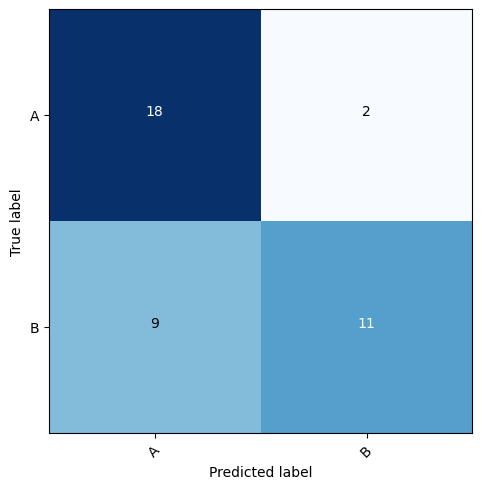

In [83]:
cm_plot_labels = ['A','B']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


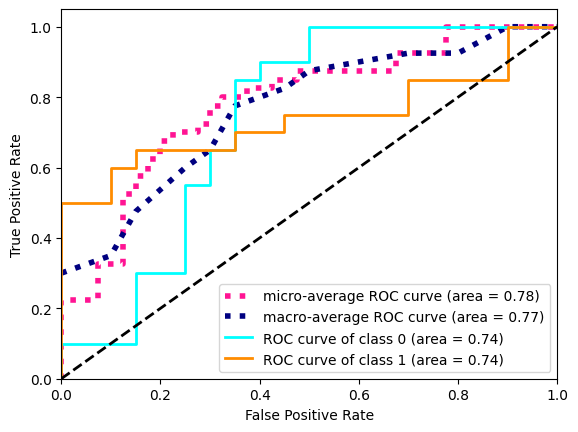

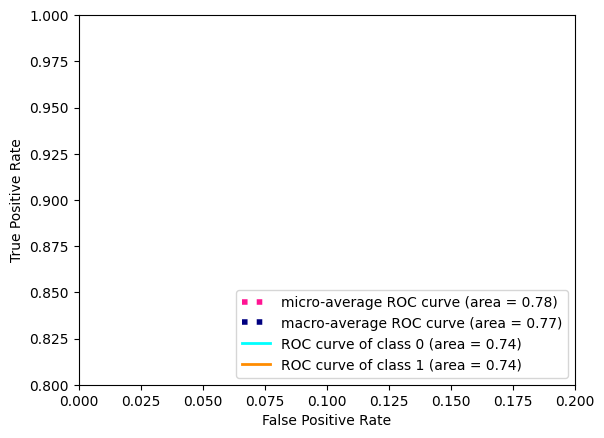

In [84]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_true=rounded_labels, y_pred=rounded_prediction))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77        20
           1       0.85      0.55      0.67        20

    accuracy                           0.73        40
   macro avg       0.76      0.73      0.72        40
weighted avg       0.76      0.72      0.72        40



In [87]:
score = metrics.log_loss(test_labels,predictions)
print("Log loss score: {}".format(score))

Log loss score: 1.43711822555282


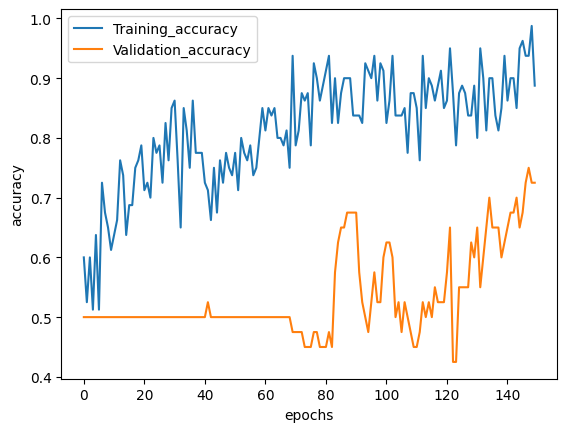

In [88]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

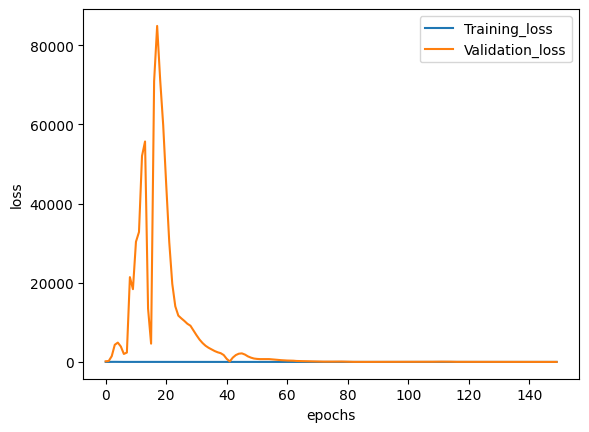

In [89]:
accs = h.history['loss']
val_accs = h.history['val_loss']

plt.plot(range(len(accs)),accs, label = 'Training_loss')
plt.plot(range(len(accs)),val_accs, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()